# Machine Learning Engineer Nanodegree
--------------
## Capstone Project
----------------------------
### Dhrubojyoti Jasu

October 17th, 2018

## I. Definition
--------------------
### Project Overview
For this capstone project, I will use a English Premier League Football dataset from http://football-data.co.uk/englandm.php . This is a binary classification problem similar to the `CharityML` in Supervised Learning section of the MLND. The legal sports-betting market in the U.S. was worth an estimated USD270 million in 2017 -- with another USD2.5 billion to USD3 billion in black market betting, according to research firm Eilers & Krejcik Gaming, LLC.

Even though it is not legalized in many other countries like India, but for my own interest, I want to build a predictive model capable of predicting if the home team will win a football match. Usually betting is conducted with human instincts but now we can use some machine learning algorithm to predict the result of the future matches also.

There are reports related to sports prediction using machine learning. Some of them I have listed below:

- [Using Machine Learning to Predict the Outcome of English County twenty over Cricket Matches](https://arxiv.org/ftp/arxiv/papers/1511/1511.05837.pdf)


- [How I Used Machine Learning to Predict Soccer Games for 24 Months Straight](https://doctorspin.me/futurism/machine-learning/)


- [Predicting Football Results With Statistical Modelling](https://dashee87.github.io/football/python/predicting-football-results-with-statistical-modelling/)


I am a regular viewer of football around the globe, my favorite club is Manchester United and I follow English Premier League religiously and now I am excited I can use my knowledge of machine learning to have some fun with data.

### Problem Statement

The problem is to use the existing dataset of EPL obtained thorugh http://football-data.co.uk/englandm.php and use it to train some supervised learning algorithms to predict the matches of EPL. I want to predict whether a home team is gonna win the match by training some supervised learning algorithms.

### Metrics

I will be using `accuracy_score` & `fbeta_score` from  [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to evaluate both the benchmark and my final model. Goal of this project is to predict win of 'Home Team' accurately. So **accuracy** as a metric to evaluate a model's performance is appropriate. However, predicting a team is not going to win is not that much important, hence, a model's ability to precisely predict the win of a 'home team' is _more important_ than the model's ability to recall those teams. 

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

For this reason, we can use **F-beta score** as a metric which considers both `precision` & `recall`.

## II. Analysis
-------------------
### Exploratory Data Analysis on EPL sessions

In the [Datasets](https://github.com/dhruboj/MLND/tree/master/projects/capstone/Datasets) I have downloaded all the sessions data seperately from the http://football-data.co.uk/englandm.php . Then I consolidated all the datasets into a final dataset called `My_Capstone_Dataset.csv` file. Now I will use all seperate sessions `csv` files to find answers to some interesting questions listed below:

- How many matches have been won/drawn by home teams?
- What is the win percentage for home teams & away teams?

While searching for above two answers I will create some visualization for clear understanding.

In [4]:
# Import all the necessary libraries for exploratory data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [5]:
# Read data from the CSV into a dataframe

# creating the local path to read the datasets
loc = "D:/Google_Drive_Jeet/Career_ML/My_Github/machine-learning/projects/capstone/Datasets/"

raw_data_1 = pd.read_csv(loc + '2000-01.csv')
raw_data_2 = pd.read_csv(loc + '2001-02.csv')
raw_data_3 = pd.read_csv(loc + '2002-03.csv')
raw_data_4 = pd.read_csv(loc + '2003-04.csv')
raw_data_5 = pd.read_csv(loc + '2004-05.csv')
raw_data_6 = pd.read_csv(loc + '2005-06.csv')
raw_data_7 = pd.read_csv(loc + '2006-07.csv')
raw_data_8 = pd.read_csv(loc + '2007-08.csv')
raw_data_9 = pd.read_csv(loc + '2008-09.csv')
raw_data_10 = pd.read_csv(loc + '2009-10.csv')
raw_data_11 = pd.read_csv(loc + '2010-11.csv')
raw_data_12 = pd.read_csv(loc + '2011-12.csv')
raw_data_13 = pd.read_csv(loc + '2012-13.csv')
raw_data_14 = pd.read_csv(loc + '2013-14.csv')
raw_data_15 = pd.read_csv(loc + '2014-15.csv')

In [6]:
#Gets all the statistics related to gameplay
                      
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS',
               'HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]

# Concatonating playing statistics

playing_statistics = pd.concat([playing_statistics_1, playing_statistics_2, playing_statistics_3, playing_statistics_4,
                                playing_statistics_5, playing_statistics_6, playing_statistics_7, playing_statistics_8,
                                playing_statistics_9, playing_statistics_10, playing_statistics_11,playing_statistics_12, 
                                playing_statistics_13, playing_statistics_14, playing_statistics_15])

In [7]:
# lets define a function for calculating all the stats
def get_result_stats(playing_stats, year):
    return pd.DataFrame(data = [ len(playing_stats[playing_stats.FTR == 'H']),
                                 len(playing_stats[playing_stats.FTR == 'A']),
                                 len(playing_stats[playing_stats.FTR == 'D'])],
                        index = ['Home Wins', 'Away Wins', 'Draws'],
                        columns =[year]
                       ).T

In [8]:
result_stats_agg = get_result_stats(playing_statistics, 'Overall')
result_stats_1 = get_result_stats(playing_statistics_1, '2000-01')
result_stats_2 = get_result_stats(playing_statistics_2, '2001-02')
result_stats_3 = get_result_stats(playing_statistics_3, '2002-03')
result_stats_4 = get_result_stats(playing_statistics_4, '2003-04')
result_stats_5 = get_result_stats(playing_statistics_5, '2004-05')
result_stats_6 = get_result_stats(playing_statistics_6, '2005-06')
result_stats_7 = get_result_stats(playing_statistics_7, '2006-07')
result_stats_8 = get_result_stats(playing_statistics_8, '2007-08')
result_stats_9 = get_result_stats(playing_statistics_9, '2008-09')
result_stats_10 = get_result_stats(playing_statistics_10, '2009-10')
result_stats_11 = get_result_stats(playing_statistics_11, '2010-11')
result_stats_12 = get_result_stats(playing_statistics_12, '2011-12')
result_stats_13 = get_result_stats(playing_statistics_13, '2012-13')
result_stats_14 = get_result_stats(playing_statistics_14, '2013-14')
result_stats_15 = get_result_stats(playing_statistics_15, '2014-15')

result_stats = pd.concat([result_stats_1, result_stats_2, result_stats_3, result_stats_4, result_stats_5,
                          result_stats_6, result_stats_7, result_stats_8, result_stats_9, result_stats_10,
                          result_stats_11, result_stats_12, result_stats_13, result_stats_14, result_stats_15])

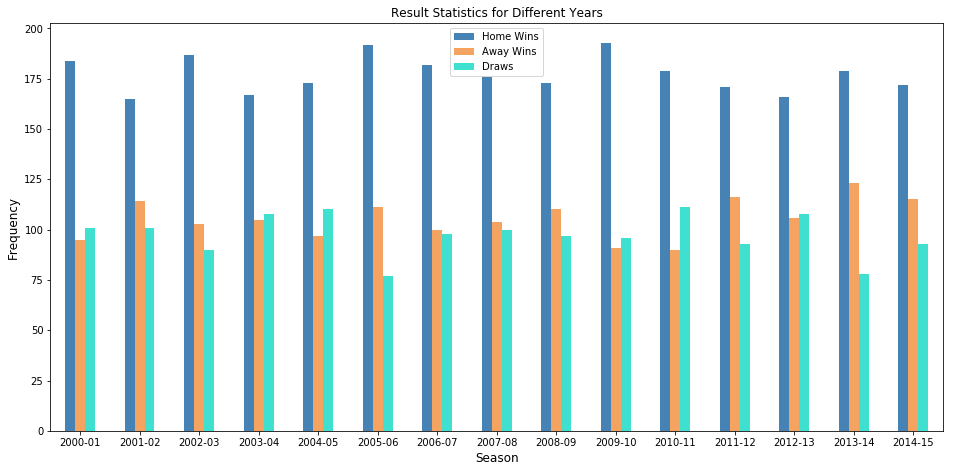

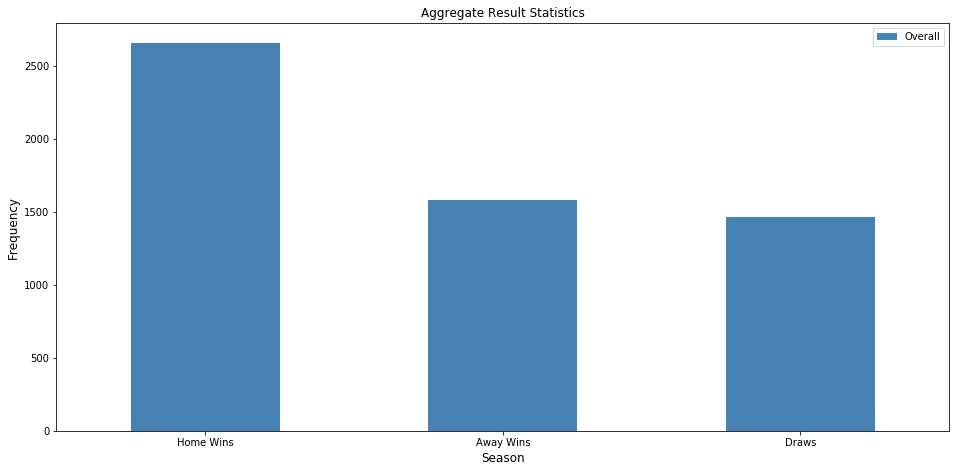

In [9]:
# Lets visualize the results
# Plotting the result dataframe
ax = result_stats.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5], 
                       title='Result Statistics for Different Years')
plt.xticks(rotation=0)
ax.set_ylabel('Frequency', size=12)
ax.set_xlabel('Season', size=12)
plt.show()

# Plotting the aggregrate result
ax1 = result_stats_agg.T.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5], 
                       title='Aggregate Result Statistics', legend = True)
plt.xticks(rotation=0)
ax1.set_ylabel('Frequency', size=12)
ax1.set_xlabel('Season', size=12)
plt.show()

#### Displaying the overall results

In [10]:
display(result_stats_agg)

,Home Wins,Away Wins,Draws
Overall,2659,1580,1461


So our first question was **_How many matches have been won/drawn by home teams?_**

From the above visualization we can clearly see more matches have won by the home teams only. It is too common in football matches as home team can feel advantage while the home crowd is supproting behind them and pitch conditions and other playing factors are also in favor of them. Now lets visualize the win percentage for Home & Away teams.

In [11]:
result_prop = result_stats.T

# 380 is the total matches in a year
for column in result_prop.columns:
    result_prop[column] = (result_prop[column] * 100) / 380  

# Renames columns
result_prop.rename(index={'Home Wins':'Home', 'Away Wins':'Away', 'Draws':'Draw'}, inplace=True)

# display the result
display(result_prop)

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
Home,48.421053,43.421053,49.210526,43.947368,45.526316,50.526316,47.894737,46.315789,45.526316,50.789474,47.105263,45.000000,43.684211,47.105263,45.263158
Away,25.000000,30.000000,27.105263,27.631579,25.526316,29.210526,26.315789,27.368421,28.947368,23.947368,23.684211,30.526316,27.894737,32.368421,30.263158
Draw,26.578947,26.578947,23.684211,28.421053,28.947368,20.263158,25.789474,26.315789,25.526316,25.263158,29.210526,24.473684,28.421053,20.526316,24.473684


,Win Percentage
Home,46.649123
Away,27.719298
Draw,25.631579


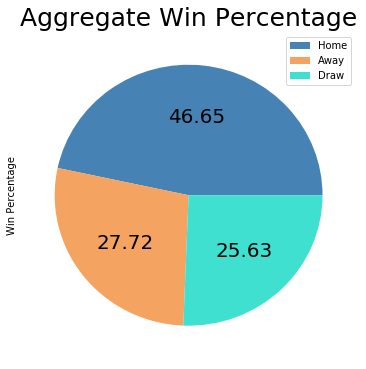

In [13]:
# Calculating average win percentage for each side:
result_avg_prop = pd.DataFrame((result_prop['2000-01'] + result_prop['2001-02'] + result_prop['2002-03'] +
                                result_prop['2003-04'] + result_prop['2004-05'] + result_prop['2005-06'] +
                                result_prop['2006-07'] + result_prop['2007-08'] + result_prop['2008-09'] + 
                                result_prop['2009-10'] + result_prop['2010-11'] + result_prop['2011-12'] + 
                                result_prop['2012-13'] + result_prop['2013-14'] + result_prop['2014-15']) / 15, 
                                columns = ['Win Percentage'])

# Plots average win percentage as a pie chart.
ax = result_avg_prop.plot(kind='pie', figsize =[6,6],autopct='%.2f', y='Win Percentage', fontsize =20, labels = None,
                          legend = True, colors = ['steelblue','sandybrown', 'turquoise'])
ax.set_title('Aggregate Win Percentage', size=25)
result_avg_prop

So from above visualization also we can see `46%` times **Home** team wins, `28%` time **Away** team wins and `25%` time matches are drawn. So majority of the times home team usually wins.

### Algorithms & Techniques
Some questions I think are right can be asked which are listed below:
- What model should we use?
- What are the features (the aspects of a game) that matter the most to predicting a team win?
- Does being the home team give a team the advantage?

I will use three _supervised learning_ algorithm listed below to train and predict on my dataset. I will deploy a `train_test_split` to shuffle & split data into a training & testing set and will compare the metrics of _three_ learning algorithms and will choose the best one amongst them. Finally I will perform a hyperparameter tuning to optimize my final classifier. Then I will try some prediction on my test data set.

- **Support Vector Machine(SVM):**
I will use a SVC classifier from sklearn.svm.SVC with 'rbf' kernel to train and predict on my dataset.
- **Random Forest:**
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.
- **xgboost:**
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost stands for eXtreme Gradient Boosting.

As Tianqi Chen said:

>The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost

Generally, XGBoost is fast. Really fast when compared to other implementations of gradient boosting.

### Benchmark

I will use an untuned `Logistic Regression` classifier from 'sklearn' to benchmark my final result. When the outcome (dependent variable) has only limited number of possible values (in our cases hometeam win or loss), Logistic Regression is used when response variable is categorical in nature. 


## III. Methodology

### Import dependencies

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [15]:
# Lets read the data
data = pd.read_csv('My_Capstone_Dataset.csv')

# Remove first 3 matchweeks
# As in first three weeks EPL team's performance are too much unpredictable in nature
# I am removing these datapoints because I don't want to include those results into my analysis

data = data[data.MW > 3]

data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)


# Preview data.
display(data.head())

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,H,1.25,1.00,D,D,W,D,W,L,0.50,0.25,0.25,-16.0
31,NH,0.75,0.25,L,L,W,D,L,L,-0.50,-0.75,0.50,-2.0
32,H,1.00,1.00,L,D,W,D,W,L,0.00,0.25,0.00,-3.0
33,NH,0.75,0.50,L,L,W,D,L,D,-0.25,-0.25,0.25,3.0
34,NH,1.00,1.50,D,L,W,W,W,L,0.00,0.75,-0.50,3.0


#### Feature Set Explanation

- FTR: Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTP - Home team points
- ATP - Away team points
- HTGD - Home team goal difference
- ATGD - away team goal difference
- DiffFormPts - Difference in points
- DiffLP - Difference in last years prediction
- HM - Home Match
- AM - Away Match

#### Lets explore this data a little bit

In [16]:
# Total number of students.
n_matches = data.shape[0]

# Calculate number of features.
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 5600
Number of features: 12
Number of matches won by home team: 2603
Win rate of home team: 46.48%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3E6C1F908>,
      dtype=object)

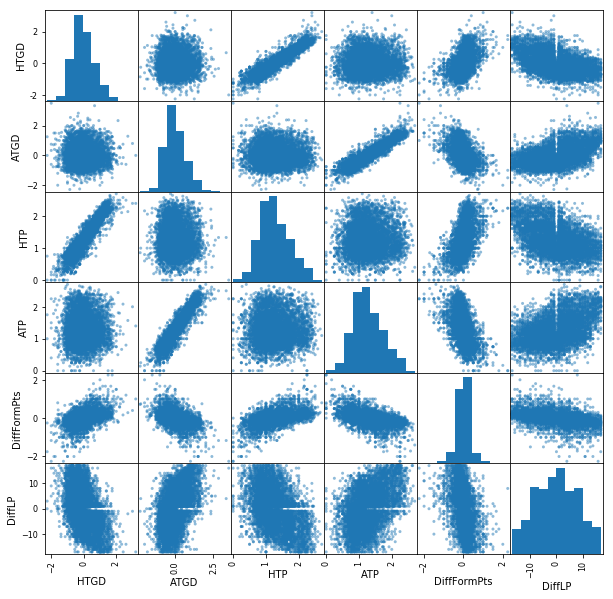

In [20]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation


scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))

The scatter matrix is plotting each of the columns specified against each other column.
You would have observed that the diagonal graph is defined as a histogram, which means that in the 
section of the plot matrix where the variable is against itself, a histogram is plotted.

Scatter plots show how much one variable is affected by another. 
The relationship between two variables is called their correlation
negative vs positive correlation

### Data Preprocessing

In [21]:
#Lets start preparing the data by Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [22]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (24 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [23]:
# Show the feature information by printing the first five rows
print ("\nFeature values:")
display(X_all.head())


Feature values:


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
30,-0.043829,-0.611968,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0.753719,0.355995,0.25,-1.989216
31,-1.120644,-2.238746,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,-0.737082,-1.138834,0.50,-0.248963
32,-0.582236,-0.611968,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0.008318,0.355995,0.00,-0.373267
33,-1.120644,-1.696487,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,-0.364382,-0.391419,0.25,0.372556
34,-0.582236,0.472551,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0.008318,1.103409,-0.50,0.372556


In [24]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

### Implementation: Creating a training & predicting pipeline

In [25]:
#for measuring training time
from time import time 

from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

### Implementation: Initial Model Evaluation

In [26]:
# Initialize my benchmark model
clf_A = LogisticRegression(random_state = 42)
# Initialize the three models
clf_B = SVC(random_state = 912, kernel='rbf')
clf_C = RandomForestClassifier(random_state = 42)
clf_D = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_D, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 5550. . .
Trained model in 0.0260 seconds
Made predictions in 0.0040 seconds.
0.6215610352557571 0.6654054054054054
F1 score and accuracy score for training set: 0.6216 , 0.6654.
Made predictions in 0.0000 seconds.
F1 score and accuracy score for test set: 0.6957 , 0.7200.

Training a SVC using a training set size of 5550. . .
Trained model in 1.8139 seconds
Made predictions in 1.0184 seconds.
0.6204535729567822 0.6803603603603604
F1 score and accuracy score for training set: 0.6205 , 0.6804.
Made predictions in 0.0110 seconds.
F1 score and accuracy score for test set: 0.6818 , 0.7200.

Training a RandomForestClassifier using a training set size of 5550. . .
Trained model in 0.0799 seconds
Made predictions in 0.0120 seconds.
0.9853789919199692 0.9863063063063063
F1 score and accuracy score for training set: 0.9854 , 0.9863.
Made predictions in 0.0020 seconds.
F1 score and accuracy score for test set: 0.6923 , 0.6800.

Training 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Refinement
- **From above result my benchmark model _Logistic Regression's_ f1 score & accuracy score on test set is 0.6957 , 0.7200 respectively.**

- **Even though Random Forest performed very well on training data but failed on test data**

- **It is clearly visible from the above result that XgBoost is the best model for this problem.**

## IV. Results
### Tuning tha parameters of XGBoost

In [28]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=40, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=2, silent=True,
       subsample=0.8)
Made predictions in 0.0130 seconds.
F1 score and accuracy score for training set: 0.6365 , 0.6827.
Made predictions in 0.0020 seconds.
F1 score and accuracy score for test set: 0.7826 , 0.8000.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Final Model Evaluation

Lets find out the difference between optimized & unoptimized metrics of my final XGBoost classifier on test set

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |   0.74            |   0.80          |
| F-score        |   0.74            |   0.78      |

My **benchmark model** **_Logistic Regression_** `f_score` & `Accuracy Score` was 0.6957 , 0.7200 respectively on test set. 

### Justification

By using my final model we can predict the results of an EPL game which is statistically more significant than pure guessing the result of a match with human instinct.

In [73]:
# Lets test the robustness of the model by introducing a never seen dataset.
test = pd.read_csv('test.csv')
test.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)

display(test.head())


,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
0,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,1.0
1,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,-7.0
2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,-7.0
3,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,-2.0
4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0,-1.0


In [76]:
# Lets run the same pre-processing on the test data
X_all = test.drop(['FTR'],1)
y_all = test['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output



X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

X_all.drop(['HM1_M', 'AM2_M', 'AM1_M', 'AM3_M', 'HM2_M', 'HM3_M'],1,inplace = True)

print ("\nFeature values:")
display(X_all.head())

Processed feature columns (30 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']

Feature values:


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts,DiffLP
0,-2.455525,-2.383762,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.001635,-0.004863,0.0,0.124332
1,-2.455525,-2.383762,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.001635,-0.004863,0.0,-0.870325
2,-2.455525,-2.383762,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.001635,-0.004863,0.0,-0.870325
3,-2.455525,-2.383762,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.001635,-0.004863,0.0,-0.248664
4,-2.455525,-2.383762,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.001635,-0.004863,0.0,-0.124332


In [90]:
# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [92]:
# Lets predict the result on the training data
f1, acc = predict_labels(clf, X_train, y_train)
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
# Lets predict the result on the test data
f1, acc = predict_labels(clf, X_test, y_test)
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

Made predictions in 0.0330 seconds.
F1 score and accuracy score for training set: 0.8339 , 0.8576.
Made predictions in 0.0030 seconds.
F1 score and accuracy score for test set: 0.8095 , 0.8400.


## Conclusion
### Free Form Visualization

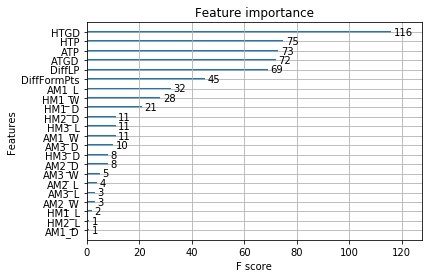

In [46]:
clf = xgb.XGBClassifier(seed=2)
clf.fit(X_train, y_train)
# TODO: Extract the feature importances using .feature_importances_ 
importances = clf.feature_importances_

from xgboost import plot_importance
# plot feature importance
plot_importance(clf)
plt.show()

#### Reflection

- In this project first I performed exploratory data analysis(EDA) with some simple visualization where it was cleary displayed that in EPL home team win proportion is higher than draw & loss.
- I have choosen three classifier to train & predict on my data. Surprisingly Random Forest gave me a very high f1-score & accuracy score on training data but performed worst relativly on testing data. This is a very common scenario of _high train score, low test score_. RandomForest learnt well from the training data but didn't performed well on testing data as compared tp **XGBoost** classifier. So I choose XGBoost as my final classifier.
- Pure guessing also can give some good result while predicting match results, but using my final trained model is more statisticaly significant for better prediction

#### Improvement
- Possible improvement can be a web app taking input of the two team & predicting the winner based on the model trained above.
- We can implement more data features like twitter sentiment analysis on pre-match analysis by training a deep neural network. For this purpose we can use millions of data points affecting a football match result. In FIFA 2018 world cup bing tried similar thing by predicting some matches result accurately.
- Possibly a neural network with a much bigger feature rich dataset can predict more accurately than my final model. 